<a href="https://colab.research.google.com/github/JesseTNRoberts/Do-Large-Language-Models-Learn-Human-Like-Strategic-Preferences/blob/main/Population_Travelers_Dilemma_Preference_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas._libs.lib import is_timedelta_or_timedelta64_array
import pandas as pd
import plotly.graph_objects as go
# !pip install researchpy
# import researchpy as rp
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install nbformat --upgrade
# !pip install seaborn --upgrade

In [2]:
# Assuming your CSV file is named "data.csv"
from google.colab import drive
drive.mount('/content/drive')
loc = "/content/drive/MyDrive/Data/"

models = [
          # 'distilbert-base-uncased',
          # 'bert-base-uncased',
          # 'bert-large-uncased',
          # 'roberta-base',
          # 'roberta-large',
          # 'xlm-roberta-large',
          # 'electra-large-generator',
          # 'openai-gpt', 'distilgpt2',
          # 'gpt2',
          # 'gpt2-medium',
          # 'open_llama_13b',
          'llama-2-7b',
          # # 'llama-2-13b',
          # # 'alpaca-7b',
          'Mistral-7B-v0.1',
          'gemma-7b',
          'SOLAR-10.7B-v1.0',
          # 'phi-2',
          ]

Mounted at /content/drive


In [3]:
def get_df(loc, select_reduction=1):

  df = pd.read_csv(loc)

  df['score (sum, mean, [list)'] = df['score (sum, mean, [list)'].apply(lambda x: x.replace('nan', '0'))
  df['score (sum, mean, [list)'] = df['score (sum, mean, [list)'].apply(ast.literal_eval)
  df.rename(columns={'score (sum, mean, [list)': 'popLM score (sum, mean, [list])'}, inplace=True)



  df['population data'] = df.apply(
      lambda row: [2**t[select_reduction] for t in row['popLM score (sum, mean, [list])']],
      axis=1)

  df['rank'] = df['rank'].astype('float')
  df['item'] = df['item'].astype('str')


  df['experiment'] = df['preamble'].apply(lambda x: x[0:-5])
  df['experiment'] = df.groupby('experiment').ngroup()+1

  df = df.explode('population data')
  df['member id'] = df.groupby(['item', 'preamble','category']).cumcount()+1
  df['population data'] = df['population data'].astype('float')

  rosch_val = 'rank'
  # rosch_val = 'label'
  # rosch_val = 'experiment'


  df['normalized'] = df.groupby(['category',rosch_val])['population data'].transform(lambda x: x/np.mean(x))

  return df


In [21]:
# loop through all models and calculate the per category correlation and significance with typicality
import plotly.graph_objects as go

prob_results = pd.DataFrame()
std_results = {}
HS = pd.DataFrame()
LS = pd.DataFrame()

exp = 'travelers/'

for model in models:

  df = get_df(loc+'rational/'+exp+model+"/HS.csv")
  df['model'] = model
  HS = pd.concat([HS, df])


  df = get_df(loc+'rational/'+exp+model+"/LS.csv")
  df['model'] = model
  LS = pd.concat([LS, df])




In [23]:

from scipy.stats import wilcoxon

for model in models:
  print(model)
  print('best')
  this = HS[HS['model']==model]
  this = this[this['category']=='best'].sort_values(['member id','preamble'])
  # this.boxplot(column='population data', by='item', figsize=(12,4), rot=60)
  print('99',wilcoxon(this[this['item']=='99-100']['population data'], this[this['item']=='100-99']['population data'], alternative='greater'))

  print('worst')
  this = HS[HS['model']==model]
  this = this[this['category']=='worst'].sort_values(['member id','preamble'])
  # this.boxplot(column='population data', by='item', figsize=(12,4), rot=60)
  print('99',wilcoxon(this[this['item']=='99-100']['population data'], this[this['item']=='100-99']['population data'], alternative='less'))
  print('\n')

llama-2-7b
best
99 WilcoxonResult(statistic=2923.0, pvalue=0.08558511705636351)
worst
99 WilcoxonResult(statistic=2311.0, pvalue=0.2309257490884281)


Mistral-7B-v0.1
best
99 WilcoxonResult(statistic=4528.0, pvalue=2.8497686418270495e-12)
worst
99 WilcoxonResult(statistic=2665.0, pvalue=0.6848716161547013)


gemma-7b
best
99 WilcoxonResult(statistic=2824.0, pvalue=0.1519610074657543)
worst
99 WilcoxonResult(statistic=2596.0, pvalue=0.5964314703232155)


SOLAR-10.7B-v1.0
best
99 WilcoxonResult(statistic=3489.0, pvalue=0.0004589617738483382)
worst
99 WilcoxonResult(statistic=2405.0, pvalue=0.33995022389485685)




In [24]:

from scipy.stats import wilcoxon

for model in models:
  print(model)
  print('best')
  this = LS[LS['model']==model]
  this = this[this['category']=='best'].sort_values(['member id','preamble'])
  # this.boxplot(column='population data', by='item', figsize=(12,4), rot=60)
  print('99',wilcoxon(this[this['item']=='99-100']['population data'], this[this['item']=='100-99']['population data'], alternative='greater'))

  print('worst')
  this = LS[LS['model']==model]
  this = this[this['category']=='worst'].sort_values(['member id','preamble'])
  # this.boxplot(column='population data', by='item', figsize=(12,4), rot=60)
  print('99',wilcoxon(this[this['item']=='99-100']['population data'], this[this['item']=='100-99']['population data'], alternative='less'))
  print('\n')

llama-2-7b
best
99 WilcoxonResult(statistic=3189.0, pvalue=0.01121377949498175)
worst
99 WilcoxonResult(statistic=2751.0, pvalue=0.7814387313070013)


Mistral-7B-v0.1
best
99 WilcoxonResult(statistic=3778.0, pvalue=8.228644061428311e-06)
worst
99 WilcoxonResult(statistic=3067.0, pvalue=0.9688090882016305)


gemma-7b
best
99 WilcoxonResult(statistic=2965.0, pvalue=0.0651572397585651)
worst
99 WilcoxonResult(statistic=2844.0, pvalue=0.8636411869593426)


SOLAR-10.7B-v1.0
best
99 WilcoxonResult(statistic=2773.0, pvalue=0.1969115804136949)
worst
99 WilcoxonResult(statistic=2547.0, pvalue=0.530148495606809)




In [41]:
from scipy.stats import wilcoxon
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ast


# function to alternate background color
def alt_bands(ax=None, highlight = None):
    ax = ax or plt.gca()
    x_left, x_right = ax.get_xlim()
    locs = ax.get_xticks()
    count = 0
    for loc1, loc2 in zip(locs, np.concatenate((locs, [x_right]))):
        if count == highlight:
          ax.axvspan(loc1-0.5, loc1+0.5, facecolor='yellow', alpha=0.2)
        elif count%2==0:
          ax.axvspan(loc1-0.5, loc1+0.5, facecolor='gray', alpha=0.2)
        count+= 1
    ax.set_xlim(x_left, x_right)


def plot_me(all, title, subtitle):

  fig, axarr = plt.subplots(2, figsize=(10,6), sharex=True, gridspec_kw={'height_ratios': [2, 2]})

  plt.margins(x=0.01)
  plt.subplots_adjust(hspace = 0)

  small = 0
  axarr[small].tick_params(bottom=False)
  # axarr[small].title.set_text("Prisoner's Dilemma in a Language Model")

  ax = axarr[small]
  ax.text(x=0.5, y=1.1, s=title, fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
  ax.text(x=0.5, y=1.0, s=subtitle, fontsize=14, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

  # preparations
  prepared = all.sort_values(by=['model','member id','preamble']).copy()
  prepared['population data'] = prepared.groupby(['model','category'], sort=False)['population data'].transform(lambda x: (x-x.min())/(x.max()-x.min()))

  # First plot
  sns.swarmplot(x='model', # Group labels
                y='population data', # Numeric variable
                palette='Set2', # Color set used
                hue='item', # Add a legend
                size=2,
                data=prepared[prepared['category']=='best'],
                dodge=True,
                ax = axarr[small],
                alpha=0.8
              )


  axarr[small].set_ylabel("Relative Probability\nof 'Best'", size=14)
  axarr[small].set(yticklabels=[])
  axarr[small].tick_params(left=False)
  axarr[small].legend(title='Strategy', loc='upper left', fancybox=True, framealpha=0.5, bbox_to_anchor=(0.5, 1),ncol=2, markerscale=2)


  # wilcoxon
  ann_height = 0.2
  size = 8

  count = 0
  for item in prepared[prepared['category']=='best'].groupby(['model'], sort=False):
    this = item[1]
    res = wilcoxon(this[this['item']==this['item'].unique()[1]]['population data'],
                  this[this['item']==this['item'].unique()[0]]['population data'],
                  alternative='greater',
                  )
    arrow = 'rarrow'
    color = 'red'
    dir = '>'

    if res.pvalue>0.95:
      res = wilcoxon( this[this['item']==this['item'].unique()[1]]['population data'],
                    this[this['item']==this['item'].unique()[0]]['population data'],
                    alternative='less',
                    )
      arrow = 'larrow'
      color = 'green'
      dir = '<'

    axarr[small].annotate('w(S'+dir+'B)='+str(res.statistic)+'\np'+r'$\approx$'+str(0 if res.pvalue<0.01 else res.pvalue)[0:4],
                      xy=(count-0.25, ann_height), xycoords='data',
                      xytext=(count, ann_height), textcoords='data',
                      size=size, va="bottom", ha="center",
                      bbox={'boxstyle': arrow,
                            'fc': color if res.pvalue<0.1 else 'gray' ,
                            'ec': color if res.pvalue<0.1 else 'gray' , 'alpha':0.2})
    count+=1




  # second plot
  small = 1
  sns.swarmplot(x='model', # Group labels
                y='population data', # Numeric variable
                palette='Set2', # Color set used
                hue='item', # Add a legend
                size=2,
                data=prepared[prepared['category']=='worst'],
                dodge=True,
                ax = axarr[small],
                legend=None,
                alpha=0.8
              )

  axarr[small].set_ylabel("Relative Probability\nof 'Worst'", size=14)
  axarr[small].set(yticklabels=[])
  axarr[small].tick_params(left=False)
  axarr[small].set(xlabel=None)
  plt.xticks(rotation=15, ha="right")

  # Alternate band colors
  alt_bands(axarr[0], highlight=1)
  alt_bands(axarr[1], highlight=1)

  # wilcoxon
  count = 0
  for item in prepared[prepared['category']=='worst'].groupby(['model'], sort=False):
    this = item[1]
    # testing for greater because the language model is rating worst
    res = wilcoxon( this[this['item']==this['item'].unique()[0]]['population data'],
                    this[this['item']==this['item'].unique()[1]]['population data'],
                    alternative='greater',
                    )
    arrow = 'larrow'
    color = 'green'
    dir = '>'

    if res.pvalue>0.95:
      res = wilcoxon( this[this['item']==this['item'].unique()[0]]['population data'],
                    this[this['item']==this['item'].unique()[1]]['population data'],
                    alternative='less',
                    )
      arrow = 'rarrow'
      color = 'red'
      dir = '<'

    axarr[small].annotate('w(B'+dir+'S)='+str(res.statistic)+'\np'+r'$\approx$'+str(0 if res.pvalue<0.01 else res.pvalue)[0:4],
                      xy=(count-0.25, ann_height), xycoords='data',
                      xytext=(count, ann_height), textcoords='data',
                      size=size, va="bottom", ha="center",
                      bbox={'boxstyle': arrow,
                            'fc': color if res.pvalue<0.1 else 'gray' ,
                            'ec': color if res.pvalue<0.1 else 'gray' , 'alpha':0.2})
    count+=1

  # resize to reduce number of swarm points
  fig.set_size_inches(7,6)

  plt.show()




LS


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.0% of the points cannot be place

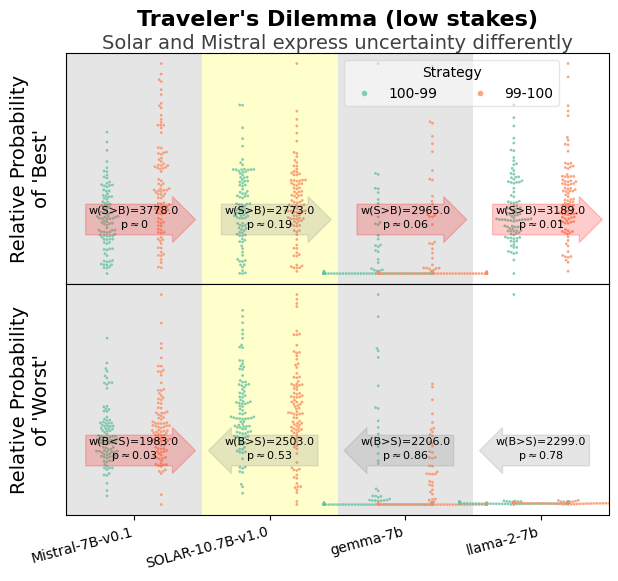

HS


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.0% of the points cannot be placed

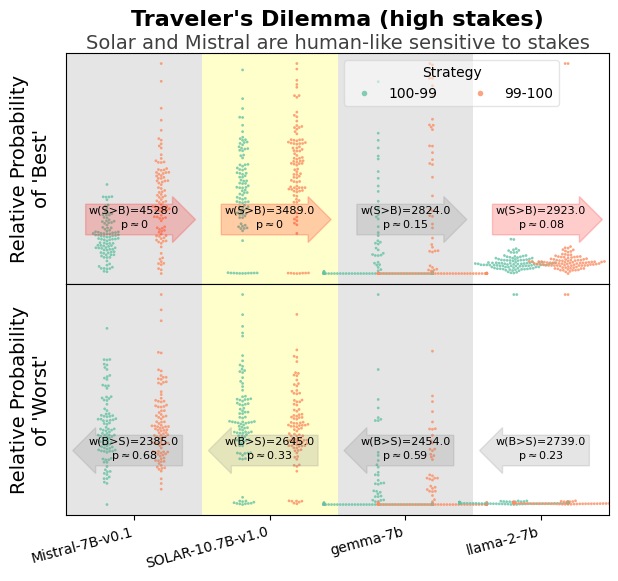

In [44]:
# loop through all models and calculate the per category correlation and significance with typicality
import plotly.graph_objects as go

prob_results = pd.DataFrame()
std_results = {}

files = [
    'LS',
    'HS',
]

titles = [
    ["Traveler's Dilemma (low stakes)", 'Solar and Mistral express uncertainty differently'],
    ["Traveler's Dilemma (high stakes)", 'Solar and Mistral are human-like sensitive to stakes'],
]

all = None
for exp, title in zip(files, titles):

  all = pd.DataFrame()
  print(exp)
  for model in models:
    df = get_df(loc+'rational/travelers/'+model+'/'+exp+".csv")
    df['model'] = model
    # base_df = get_df(loc+'rational/'+ exp +'/base/'+model+".csv")
    # base_df['model'] = model

    all = pd.concat([all, df])


    categories = ['best','worst']

  plot_me(all, title[0], title[1])